In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_num = pd.read_csv("train.csv")
test_num = pd.read_csv("test.csv")

In [3]:
train_data = shuffle(train_num.values)
train_data.shape
Y_train = train_data[:,:1]
X_train = train_data[:,1:]/255.0
test = test_num/255.0

In [4]:
X_train = X_train.reshape(-1,28,28,1)
test = np.asarray(test).reshape(-1,28,28,1)

In [5]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [13]:
model = Sequential()

# Step 1 - Convolution
model.add(Convolution2D(filters = 32,kernel_size = (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

# Adding a second convolutional layer
model.add(Convolution2D(filters = 64,kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

# Step 3 - Flattening
model.add(Flatten())


# Step 4 - Full connection
model.add(Dense(output_dim = 256, activation = 'relu'))
model.add(Dense(output_dim = 10, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


/home/zad/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=256)`
/home/zad/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [15]:
epochs = 30
batch_size = 64
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs,
                              validation_data = (X_val, Y_val), verbose = 2)

Epoch 1/30
 - 7s - loss: 0.6256 - acc: 0.7962 - val_loss: 0.1170 - val_acc: 0.9690
Epoch 2/30
 - 7s - loss: 0.2362 - acc: 0.9260 - val_loss: 0.0664 - val_acc: 0.9814
Epoch 3/30
 - 7s - loss: 0.1736 - acc: 0.9451 - val_loss: 0.0513 - val_acc: 0.9840
Epoch 4/30
 - 7s - loss: 0.1473 - acc: 0.9541 - val_loss: 0.0513 - val_acc: 0.9852
Epoch 5/30
 - 7s - loss: 0.1291 - acc: 0.9598 - val_loss: 0.0462 - val_acc: 0.9867
Epoch 6/30
 - 7s - loss: 0.1143 - acc: 0.9640 - val_loss: 0.0425 - val_acc: 0.9876
Epoch 7/30
 - 7s - loss: 0.1040 - acc: 0.9671 - val_loss: 0.0385 - val_acc: 0.9895
Epoch 8/30
 - 7s - loss: 0.0994 - acc: 0.9693 - val_loss: 0.0390 - val_acc: 0.9898
Epoch 9/30
 - 7s - loss: 0.0949 - acc: 0.9710 - val_loss: 0.0385 - val_acc: 0.9886
Epoch 10/30
 - 7s - loss: 0.0914 - acc: 0.9718 - val_loss: 0.0360 - val_acc: 0.9907
Epoch 11/30
 - 7s - loss: 0.0872 - acc: 0.9719 - val_loss: 0.0322 - val_acc: 0.9921
Epoch 12/30
 - 7s - loss: 0.0823 - acc: 0.9736 - val_loss: 0.0401 - val_acc: 0.9888
E

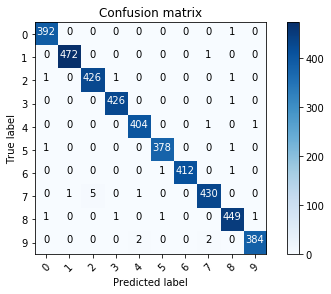

In [16]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 


In [17]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [18]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("KerasV3.csv",index=False)